### Question 1: Estimate treatment effects in hotel cancellation

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
# Load the dataset from local csv file
hotel = pd.read_csv("/Users/Administratoor/Documents/Winter/BAX 452 - Machine Learning/Assignment 4/hotel_cancellation.csv")
hotel = hotel.drop('Unnamed: 0', axis=1)
hotel.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,different_room_assigned,is_canceled
0,13,2015,27,1,0,False,False
1,14,2015,27,1,0,False,False
2,14,2015,27,1,0,False,False
3,9,2015,27,1,0,False,False
4,85,2015,27,1,0,False,True


In [3]:
# Column for treatment indicator is not numeric values
type("different_room_assigned")

str

In [4]:
# Column for treatment effects is also not numeric values
type("is_canceled")

str

In [5]:
# Create the treatment variable, and change boolean values to 1 and 0
hotel['treatment'] = hotel['different_room_assigned'].apply(lambda x: 1 if x == True else 0)

# Create the treatment_effects variable, and change boolean values to 1 and 0
hotel['treatment_effects'] = hotel['is_canceled'].apply(lambda x: 1 if x == True else 0)

# Take a look at the data
hotel.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,different_room_assigned,is_canceled,treatment,treatment_effects
0,13,2015,27,1,0,False,False,0,0
1,14,2015,27,1,0,False,False,0,0
2,14,2015,27,1,0,False,False,0,0
3,9,2015,27,1,0,False,False,0,0
4,85,2015,27,1,0,False,True,0,1


In [6]:
# Causal inference
# pip install causalinference
from causalinference import CausalModel

# Run causal model with all the other columns as covariates
causal = CausalModel(Y = hotel['treatment_effects'].values, 
                     D = hotel['treatment'].values, 
                     X = hotel[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list']].values)

# Print summary statistics
print(causal.summary_stats)


Summary Statistics

                     Controls (N_c=91673)       Treated (N_t=11221)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.432        0.495        0.051        0.220       -0.381

                     Controls (N_c=91673)       Treated (N_t=11221)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0      116.468      109.178       73.114       85.262       -0.443
             X1     2016.182        0.703     2015.949        0.695       -0.334
             X2       27.249       13.100       28.076       14.651        0.060
             X3       15.804        8.804       15.642        8.714       -0.019
             X4        2.644       18.955        2.422       17.457       -0.012



In the summary table above, the Treated Mean 0.051 is much smaller than the Controls Mean 0.432, indicating that if a different room is assigned to the customer, there will be less rooms being cancelled. Therefore, assigning a different room when people fail to book their desired room actually helps the hotel to reduce the cancellation rate by potential customers.

In [8]:
# To use the future default and silence this warning... we use
rcond=None

# OLS treatment estimation adj=0 
causal.est_via_ols(adj=0)
print('adj=0', causal.estimates)

adj=0 
Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.381      0.003   -143.861      0.000     -0.386     -0.375



adj=0 only includes the treatment variable in the model, and it produces the raw differences between the treatment and the control group. This gives us the average treatment effects (ATE) of -0.381, which is exactly the same as the raw differences we calculated above.

In [9]:
# OLS treatment estimation adj=1
causal.est_via_ols(adj=1)
print('adj=1', causal.estimates)

adj=1 
Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.337      0.003   -118.276      0.000     -0.343     -0.332



adj=1 includes the treatment variable and the covariates as the model predictors. This gives us the average treatment effects (ATE) of -0.337, which is the same as the true causal impact.

In [10]:
# OLS treatment estimation adj=2
causal.est_via_ols(adj=2)
print('adj=2', causal.estimates)

adj=2 
Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.365      0.003   -113.324      0.000     -0.371     -0.359
           ATC     -0.369      0.003   -110.673      0.000     -0.375     -0.362
           ATT     -0.335      0.003   -124.098      0.000     -0.341     -0.330



adj=2 includes the treatment variable, the covariates, and the interactions between the treatment variable and the covariates as model predictors. This produces the true causal impact values for the average treatment effects (ATE), the average treatment effect on the control (ATC), and the average treatment effect on the treated (ATE).

### Alternatively, we may run logistic regression considering that both treatment indicator & effects are categorical variables

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [12]:
data = pd.read_csv("/Users/Administratoor/Documents/Winter/BAX 452 - Machine Learning/Assignment 4/hotel_cancellation.csv")
data = data.drop('Unnamed: 0', axis=1)
data.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,different_room_assigned,is_canceled
0,13,2015,27,1,0,False,False
1,14,2015,27,1,0,False,False
2,14,2015,27,1,0,False,False
3,9,2015,27,1,0,False,False
4,85,2015,27,1,0,False,True


In [13]:
# Create a binary indicator for the categorical variables
data['treatment'] = (data['different_room_assigned'] == True).astype(int)
data['treatment_effects'] = (data['is_canceled'] == True).astype(int)

data.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,different_room_assigned,is_canceled,treatment,treatment_effects
0,13,2015,27,1,0,False,False,0,0
1,14,2015,27,1,0,False,False,0,0
2,14,2015,27,1,0,False,False,0,0
3,9,2015,27,1,0,False,False,0,0
4,85,2015,27,1,0,False,True,0,1


In [14]:
# Treatment effects represented as "y", all variables as "X" (including treatment d)
y = data['treatment_effects']
X = data[['treatment', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list']]

# Treatmet indicator represented as "d", all other covariates as "x" (confounders for d)
d = data['treatment']
x = data[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list']]

# Fit a logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the treatment effect estimates
print(result.params)

Optimization terminated successfully.
         Current function value: 0.598443
         Iterations 7
treatment                   -2.518556
lead_time                    0.005202
arrival_date_year           -0.000375
arrival_date_week_number    -0.004168
arrival_date_day_of_month   -0.001143
days_in_waiting_list         0.001325
dtype: float64


The output shows the estimated treatment effects for each covariate in the model. The treatment effect for different_room_assigned (the binary indicator of whether a different room is provided as an option or not) represents the difference in the log odds of room cancellation between customers who are offerd this option and those who are not, controlling for the effects of lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, and days_in_waiting_list. 

The magnitude of the difference of log odds indicates the size of the treatment effect. The larger the difference, the greater the effect of the treatment. A positive difference of log odds means that the treatment group has a higher log odds of a positive outcome compared to the control group, while a negative difference of log odds means that the control group has a higher log odds of a positive outcome compared to the treatment group.

From the output summary, the negative value of -2.518556 for "treatment" indicates that customers who are able to switch to a different room had a lower odds of cancelling booked rooms compared to customers who were not provided the option, and (if) a positive estimate would indicate the opposite conclusion. 

### Question 2: Use Double Logistic Regression to estimate treatment effects

- Some notes for the question:

Double logistic is more suitable for the hotels dataset, because the variable we are analyzing the treatment effect of is categorical (on a categorical response). Both Lasso and Logistic regression are achievable in a Python environment, it's just that for this dataset we think the Logistic method is more suitable; Also, we may choose whether to have/not have all variables equally penalized by importing python packages. It is recommend using statsmodels > sklearn library for LogisticRegression.

In [18]:
## (stage 1) predict d_hat(x) or the treatment from all of the covariates;
## (stage 2) use the predicted d_hat(x), all covariates, and d (treatment) to predict y (response). 
## We don't penalize d_hat in stage 2. 
## Using statsmodels library allows us to pass in weights so we can 0 out the penalty for d_hat only.

In [15]:
# Implementing double LASSO with penalty (which is not suitable for the hotel dataset):
# For exploration purposes:

model1 = sm.OLS(d, x).fit()
d_hat = np.array(model1.predict(x)).reshape(len(x), 1)
x_new = np.hstack((x, d_hat))
model2 = sm.OLS(y, x_new).fit_regularized(method='elastic_net', alpha = [0.1, 0.1, 0.1, 0.1, 0.1, 0])

print(model2.params)

x1    0.001412
x2    0.000106
x3   -0.000845
x4    0.000000
x5    0.000000
x6    0.383328
dtype: float64


In [26]:
# Implementing double logistic with penalty (which is more suitable for the hotel dataset):

# Stage 1: Fit a logistic regression model to predict treatment d_hat(x) as a function of all other covariates
model1 = sm.Logit(d, x).fit()
d_hat = np.array(model1.predict(x)).reshape(len(x), 1)
d_predict = model1.predict(x) # same as d_hat

print(model1.params)

Optimization terminated successfully.
         Current function value: 0.334283
         Iterations 6
lead_time                   -0.005240
arrival_date_year           -0.000890
arrival_date_week_number     0.007843
arrival_date_day_of_month   -0.003234
days_in_waiting_list         0.004743
dtype: float64


In [28]:
# Stage 2: Fit a logistic regression model to predict y from [d_hat(x), d, x] where d_hat is not penalized.
# Note that x_new includes "X" (not "x"), the effect would be the same as "d+x".

x_new = pd.merge(X, pd.DataFrame(d_predict), left_index = True, right_index = True)
# x_new = np.hstack((X, d_hat))

model2 = sm.Logit(y, x_new).fit()
# model2 = sm.Logit(y, x_new).fit_regularized(method='l1', alpha = [0.1, 0.1, 0.1, 0.1, 0.1, 0])

print(model2.params)

Optimization terminated successfully.
         Current function value: 0.596827
         Iterations 7
treatment                    -2.504256
lead_time                     0.000658
arrival_date_year             0.000395
arrival_date_week_number      0.005383
arrival_date_day_of_month    -0.004647
days_in_waiting_list          0.004968
0                           -11.692611
dtype: float64


Using Double Logistic Regression, the coefficient for treatment indicator in the output is -2.504256. This result is close to what we've achieved from question (1), where the value is -2.518556. The value shows the difference between the log odds (not odds ratio) for customers with different_room_assigned=1 and those with different_room_assigned=0. Customers who are able to switch to a different room had a lower odds of cancelling booked rooms compared to customers who were not provided the switching option.

In [37]:
# Transform the log value back to odds ratio
import math
math.exp(-2.504256)

0.08173638724099357

In [38]:
# Interpret the odds ratio
1- math.exp(-2.504256)

0.9182636127590065

By taking the exponential value of log odds, we say that 0.91826 represents that the probability of cancellation of one customer group (with different room assigned) is 91.826% lower than the probability of the other group of customers (without different room assigned).

### Question 3: Use bootstrap to estimate the standard error of the treatment effects

In [49]:
# Define variables for bootstrapping:
model_bootstrap = sm.Logit(y, X).fit()
y_hat = np.array(model_bootstrap.predict(X)).reshape(len(X), 1)

x_new = np.hstack((X, y_hat))
model2 = sm.Logit(y, x_new).fit()

Optimization terminated successfully.
         Current function value: 0.598443
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598387
         Iterations 7


In [47]:
# Define the number of bootstrap resamples
n_resamples = 1000

# Initialize a matrix to store the treatment effect estimates
treat_effects = np.zeros((n_resamples, model2.params.shape[0] - 1))

# Use bootstrapping to estimate the standard error of the treatment effects
i = 0

while i < n_resamples:

    resample_index = np.random.choice(data.index, size = data.index.size, replace = True)
    resample = data.iloc[resample_index]
    
    x_resample = X.iloc[resample_index]
    y_resample = y.iloc[resample_index]
    
    
    # Run the double logistic regression similarly as in (2)
    model1 = sm.Logit(y_resample, x_resample).fit()
    y_hat = np.array(model1.predict(x_resample)).reshape(len(y_hat), 1)
    
    x_new = np.hstack((x_resample, y_hat))
    model2 = sm.Logit(y_resample, x_new).fit()
    
    # Iterate the above process and store all treatment effect estimates in the matrix
    treat_effects[i, :] = model2.params[:-1]
    i += 1

Optimization terminated successfully.
         Current function value: 0.598340
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598244
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.600631
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.600588
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.597456
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.597344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.599748
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.599706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.599693
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.599646
  

In [48]:
# Calculate the standard error of the treatment effects
treat_effects_se = treat_effects.std(axis=0)

## For the bootstrap, standard errors are the standard deviation of statistic values obtained for bootstrap samples 
## so, we doesn't need to divide by sqrt(n) i.e. sqrt(1000) in this case.
## treat_effects_se = treat_effects.std(axis=0)/np.sqrt(n_resamples)


# Print the standard errors of the treatment effect estimates
print('Standard errors of the treatment effects:')
print(treat_effects_se)

Standard errors of the treatment effects:
[1.62078281e-01 5.26915031e-04 6.92186139e-05 5.18887232e-04
 5.05377077e-04 3.07002244e-04]


We generate 1000 resamples of the data, fit the double logistic regression model to each resample, and store the estimated treatment effects for each covariate. Finally, we calculate the standard deviation of the treatment effects across the resamples as an estimate of the standard error. The output will give the standard errors for each covariate in the model, representing the difference in the log-odds of cancellation between customers with different room assigned and customers without different room assigned, controlling for the effects of all other covariates.

### Question 4: Explore drinking data with an RDD

In [72]:
# Load dataset from csv file
drinking = pd.read_csv("/Users/Administratoor/Documents/Winter/BAX 452 - Machine Learning/Assignment 4/drinking.csv")
drinking = drinking.dropna()

# View dataset
drinking.head()

,age,others,accident,suicide
0,19.068493,92.825401,35.829327,11.203714
1,19.150684,95.100739,35.639256,12.193368
2,19.232876,92.144295,34.205650,11.715812
3,19.315069,88.427757,32.278957,11.275010
4,19.397261,88.704941,32.650967,10.984314


In [73]:
# Split dataset based on column values condition
df1 = drinking[drinking['age'] < 21]
df2 = drinking[drinking['age'] >= 21]

In [74]:
# Splitted subset1 with age under the threshold value
df1.head()

,age,others,accident,suicide
0,19.068493,92.825401,35.829327,11.203714
1,19.150684,95.100739,35.639256,12.193368
2,19.232876,92.144295,34.205650,11.715812
3,19.315069,88.427757,32.278957,11.275010
4,19.397261,88.704941,32.650967,10.984314


In [75]:
# Splitted subset2 with age above the threshold value
df2.head()

,age,others,accident,suicide
26,21.041096,105.268350,36.316807,12.402751
27,21.123287,101.066510,32.575798,14.831890
28,21.205479,96.966522,33.022293,12.213193
29,21.287672,102.826900,35.106873,14.455770
30,21.369864,100.979430,32.358696,13.583627


In [97]:
# Calculate the difference between average to one side of the threshold and average to the other side:

In [98]:
import statistics

In [78]:
# Average diff. in "accident"
statistics.mean(df2['accident']) - statistics.mean(df1['accident'])

-1.6773559583333295

This shows that alcohol does not increase the chance of death by accident.

In [80]:
# Average diff. in "suicide"
statistics.mean(df2['suicide']) - statistics.mean(df1['suicide'])

1.4364419166666664

This shows that alcohol increases the chance of death by suicide.

In [81]:
# Average diff. in "others"
statistics.mean(df2['others']) - statistics.mean(df1['others'])

5.740044166666664

This shows that alcohol increases the chance of death by 'other reasons'.

### “Should the legal age for drinking be reduced from 21?"

No. Because people who are below the age of 21 behaved differently from those who are above the legal drinking age of 21. From calculating the mean difference of two groups, we find that people above the threshold age overall had higher chance of commiting suicide or dying for other reasons. Thus, a reduction in cut-off value in age restriction should worsen the situation.

In [96]:
# Plot graphs to show results for the change in chances of death with all the three features:

In [84]:
import matplotlib.pyplot as plt

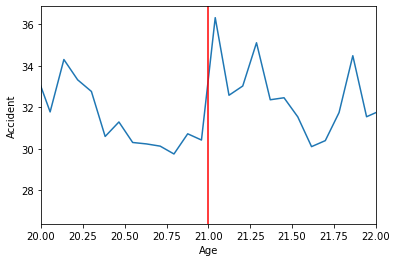

In [295]:
# accident vs age
plt.plot(drinking['age'], drinking['accident'])
plt.xlim([20, 22]) ## choose the bandwidth to be 1 year (i.e., 21 +- 1)
plt.xlabel('Age')
plt.ylabel('Accident')

plt.axvline(x = 21, color = 'r', label = 'axvline - full height')
plt.show()

## Cannot find discontinuity in the graph.

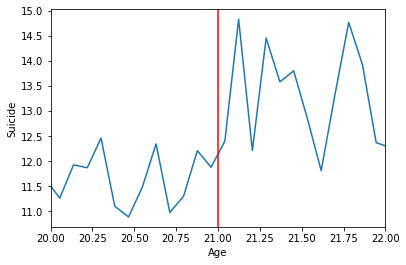

In [296]:
# suicide vs age
plt.plot(drinking['age'], drinking['suicide'])
plt.xlim([20, 22]) ## choose the bandwidth to be 1 year (i.e., 21 +- 1)
plt.xlabel('Age')
plt.ylabel('Suicide')

plt.axvline(x = 21, color = 'r', label = 'axvline - full height')
plt.show()

## Cannot find discontinuity in the graph.

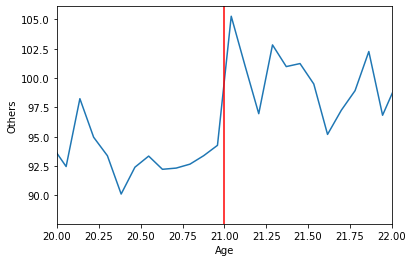

In [297]:
# others vs age
plt.plot(drinking['age'], drinking['others'])
plt.xlim([20, 22]) ## choose the bandwidth to be 1 year (i.e., 21 +- 1)
plt.xlabel('Age')
plt.ylabel('Others')

plt.axvline(x = 21, color = 'r', label = 'axvline - full height')
plt.show()

## Cannot find discontinuity in the graph.

### What might be the effect of choosing a smaller bandwidth?

In [102]:
# Repeat the above procedures, except that graphs now have smaller bandwidths, e.g. 0.02 year.

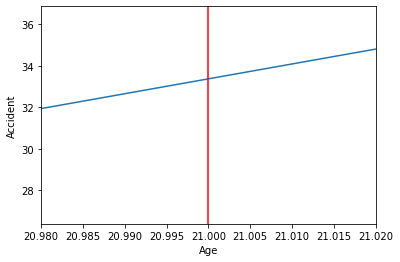

In [179]:
# accident vs age
plt.plot(drinking['age'], drinking['accident'])
plt.xlim([20.98, 21.02]) ## choose the bandwidth to be 0.02 year (i.e., 21 +- 0.02)
plt.xlabel('Age')
plt.ylabel('Accident')

plt.axvline(x = 21, color = 'r', label = 'axvline - full height')
plt.show()

## Cannot find discontinuity in the graph.

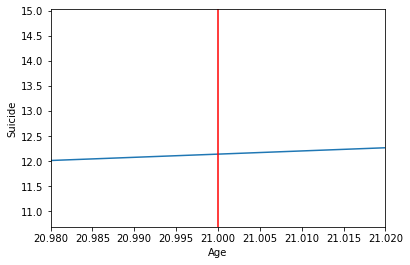

In [178]:
# suicide vs age
plt.plot(drinking['age'], drinking['suicide'])
plt.xlim([20.98, 21.02]) ## choose the bandwidth to be 0.02 year (i.e., 21 +- 0.02)
plt.xlabel('Age')
plt.ylabel('Suicide')

plt.axvline(x = 21, color = 'r', label = 'axvline - full height')
plt.show()

## Cannot find discontinuity in the graph.

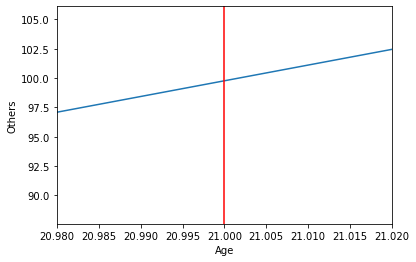

In [177]:
# others vs age
plt.plot(drinking['age'], drinking['others'])
plt.xlim([20.98, 21.02]) ## choose the bandwidth to be 0.02 year (i.e., 21 +- 0.02)
plt.xlabel('Age')
plt.ylabel('Others')

plt.axvline(x = 21, color = 'r', label = 'axvline - full height')
plt.show()

## Cannot find discontinuity in the graph.

Choosing a smaller bandwidth help to observe the marginal difference between the two groups more accurately. However, it didn't change our conclusion from the three plots.  The chances of death with all the three features (i.e., accident, suicide, and others) all increase continuously along the y-axis, corresponding to an increase in x-axis (age). There is no discontinuity/drastic change found near the threshold value. 

### What if we chose the maximum bandwidth?

The effect would be there is no "quasi-random experiment" here. If so, we not only include people who are at the margin(i.e. just below/above the age of 21), but also include all those to the very left/right of the graph (i.e. those who are much younger/older). There are many other factors which also increase the chance of death, in addition to drinking alcohol. Therefore, the maximum bandwidth is so wide that we may not measure the causal effects of alcohol policy by using RDD method. 

### Question 5: KNN Classification in iris dataset

In [210]:
# Load dataset from csv file
iris = pd.read_csv('/Users/Administratoor/Documents/Winter/BAX 452 - Machine Learning/Assignment 4/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [211]:
# Identify all categorical variables (optional in this case)
iris.select_dtypes(['object']).columns

Index(['variety'], dtype='object')

In [212]:
# Convert the categorical variable to numerics 0,1,2 (representing three types of iris)
iris['variety'] = pd.factorize(iris['variety'])[0]

In [213]:
# View dataset
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [245]:
# Build a model with four explanatory factors
X = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = iris['variety']

In [215]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [250]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) ## default "shuffle" = TRUE

In [251]:
# Check the dimension of training set
X_train.shape

(120, 4)

In [252]:
# Check the dimension of test set
X_test.shape

(30, 4)

### How does the performance of k-nearest neighbors change as k takes on the following values: 1, 3, 5, 7?

In [219]:
# Import K-Nearest Neighbors Classifier Model
from sklearn.neighbors import KNeighborsClassifier

In [260]:
# Create KNN Classifier when k = 1...
knn1 = KNeighborsClassifier(n_neighbors = 1)

In [261]:
# Train the model using the training sets
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [263]:
# Predict the response for test dataset
y_pred1 = knn1.predict(X_test)

In [298]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [294]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision Score:", metrics.precision_score(y_test, y_pred1, average= 'macro'))
print("Recall Score:", metrics.recall_score(y_test, y_pred1, average= 'macro'))
print("F1 Score:", metrics.f1_score(y_test, y_pred1, average= 'weighted'))

Accuracy: 0.9333333333333333
Precision Score: 0.9166666666666666
Recall Score: 0.9444444444444445
F1 Score: 0.935064935064935


In [293]:
# Similarly, when k = 3...

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train,y_train)
y_pred3 = knn3.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision Score:", metrics.precision_score(y_test, y_pred3, average= 'macro'))
print("Recall Score:", metrics.recall_score(y_test, y_pred3, average= 'macro'))
print("F1 Score:", metrics.f1_score(y_test, y_pred3, average= 'weighted'))

Accuracy: 0.9333333333333333
Precision Score: 0.9166666666666666
Recall Score: 0.9444444444444445
F1 Score: 0.935064935064935


In [292]:
# Similarly, when k = 5...

knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train,y_train)
y_pred5 = knn5.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))
print("Precision Score:", metrics.precision_score(y_test, y_pred5, average= 'macro'))
print("Recall Score:", metrics.recall_score(y_test, y_pred5, average= 'macro'))
print("F1 Score:", metrics.f1_score(y_test, y_pred5, average= 'weighted'))

Accuracy: 0.9666666666666667
Precision Score: 0.9523809523809524
Recall Score: 0.9722222222222222
F1 Score: 0.9672240802675586


In [291]:
# Similarly, when k = 7...

knn7 = KNeighborsClassifier(n_neighbors = 7)
knn7.fit(X_train,y_train)
y_pred7 = knn7.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred7))
print("Precision Score:", metrics.precision_score(y_test, y_pred7, average= 'macro'))
print("Recall Score:", metrics.recall_score(y_test, y_pred7, average= 'macro'))
print("F1 Score:", metrics.f1_score(y_test, y_pred7, average= 'weighted'))

Accuracy: 0.9666666666666667
Precision Score: 0.9523809523809524
Recall Score: 0.9722222222222222
F1 Score: 0.9672240802675586


### Which of these is the optimal value of k?

Among the following values: 1, 3, 5, 7, k = 5 or 7 is the better option, because the accuracy of its model prediction is higher (approximately 97% on the test set). The same goes with precision, recall and F1-score.

### Which distance/similarity metric did you choose to use and why?

In [303]:
import sklearn

# List valid metrics for pairwise_distances:
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

In [309]:
## metric: str or callable, default=’minkowski’
## Metric to use for distance computation. 
## Default is “minkowski”, which results in the standard Euclidean distance when p = 2.

## p: int, default=2
## Power parameter for the Minkowski metric. 
## When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. 

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [310]:
# For fixed value of k = 5... try various distance metrics:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'cosine')

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [311]:
# For fixed value of k = 5... try various distance metrics:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [312]:
# For fixed value of k = 5... try various distance metrics:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


Comparison between distance metrics: Based on the above results, I would prefer using the Cosine similarity or Euclidean distance than the Manhattan distance approach. The Manhattan approach has a lower accuracy than these two approaches. When I use my KNN model for making predictions, the Cosine/Euclidean metric will be more reliable in dividing classes. 